#Tratativas Iniciais

**Importando bibliotecas e datasets**

In [16]:
from dtype_diet import report_on_dataframe, optimize_dtypes
from summarytools import dfSummary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
url = 'https://raw.githubusercontent.com/PedroReste/repository_for_studies/main/churn_prediction_models/ecommerce_dataset_sem_tratamento.csv'
df = pd.read_csv(url, sep=';')

**Otimizando os tipos do dataset**

A biblioteca **dtype diet** é interessante para otimizar os tipos de cada variável para ficar mais rápido processar os dados.

Para essa base de dados não é tão necessário por conta de ser pequena, mas se estive utilizando para base de dados gigantes, isso seria uma ótima pedida, economizando processamento, tempo e dinheiro.

In [18]:
optimized_df = report_on_dataframe(df, unit="MB")
df_optimized = optimize_dtypes(df, optimized_df)

print(f'Original df memory: {df.memory_usage(deep=True).sum()/1024/1014} MB')
print(f'Propsed df memory: {df_optimized.memory_usage(deep=True).sum()/1024/1014} MB')

Original df memory: 2.4223709858851086 MB
Propsed df memory: 0.1702916974852071 MB


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [20]:
df_optimized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int32   
 1   Churn                        5630 non-null   int8    
 2   Tenure                       5366 non-null   float16 
 3   PreferredLoginDevice         5630 non-null   category
 4   CityTier                     5630 non-null   int8    
 5   WarehouseToHome              5379 non-null   float16 
 6   PreferredPaymentMode         5630 non-null   category
 7   Gender                       5630 non-null   category
 8   HourSpendOnApp               5375 non-null   float16 
 9   NumberOfDeviceRegistered     5630 non-null   int8    
 10  PreferedOrderCat             5630 non-null   category
 11  SatisfactionScore            5630 non-null   int8    
 12  MaritalStatus                5630 non-null   category
 13  Num

In [21]:
df = df_optimized

#Análise Descretiva

In [22]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

Antes de verificar algumas informações gerais sobre a base de dados, ideal saber a descrição de cada variável que estamos dentro do dataframe.
- **CustomerID:** Identificador Único dos Usuários
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa, provavelmente é meses pelos valores encontrados logo abaixo.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce.
- **CityTier:**	O nível da cidade. **(na base original não informação geral sobre, precisa investigar mais profundamente o que significa)**
- **WarehouseToHome:** Distância entre o armazém e a casa dos usuários.
- **PreferredPaymentMode:** Formato de Pagamento preferencial dos usuários.
- **Gender:** Gênero dos usuários.
- **HourSpendOnApp:** Quantidade de horas gastas pelo usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
- **SatisfactionScore:** Pontuação da satisfação dos usuários.
- **MaritalStatus:** Status matrimonial dos usuários.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.


In [23]:
#Sumário geral descretivas da base
dfSummary(df)

C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\Computador\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CustomerID[int32],Mean (sd) : 52815.5 (1625.4)min < med < max:50001.0 < 52815.5 < 55630.0IQR (CV) : 2814.5 (32.5),"5,630 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Churn[int8],Mean (sd) : 0.2 (0.4)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.4),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
3,Tenure[float16],Mean (sd) : 10.2 (8.6)min < med < max:0.0 < 9.0 < 61.0IQR (CV) : 14.0 (1.2),36 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACOElEQVR4nO3czW7aQBSG4TMloQNUNogWdmzZZcGSi+jF9iLYch9IJjLCNQEhd1OqSPkB23Hjb/Q+68wki5dYxsfjiqIwoO2+fPYfANzi7toPOOd6ZtatuP+xKIq84lrgn3dDdc71xuPxzyiKRlU23+12j865X8SKuq79R+1GUTRaLpd5HMeHMhunaepXq9UoSZKumREqarl66Tczi+P4MJlMflfYv1dhDfACN1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQcNPr0lWdz+d7M4ucc1W34KQVmFmDoWZZdn86nR5ms1mn0+mUOrzigpNWcNFYqMfj8c57318sFofpdPpYdj0nreC5Ri/9ZmaDwaDqKStmnLSCv7iZggRChQRChQRChQRChQRChQRChQRChQRChYTGn0zVUXOohYGWgLQ21LpDLQy0hKW1odYZamGgJTytDfWixlALAy0B4WYKEggVEggVEggVEggVEggVElr/9VRVvKodliBD5VXt8AQZKq9qhyfIUC94VTsc3ExBAqFCQtCX/jqYhW0XQn0Fs7DtQ6ivYBa2fQj1HczCtgc3U5BAqJBAqJBAqJBAqJBAqJDA11MN4KnWxyPUD8ZTrWbcFGqapr7sxvv93puZZVnmN5tN/3+u/8zfvd1uv3nv+/P53A2Hw6cya/M8/7per38kSfLdObcrszYAT0VRvPnB/gPF+BQZ3sJuZAAAAABJRU5ErkJggg=="">",264(4.7%)
4,PreferredLoginDevice[category],1. Mobile Phone2. Computer3. Phone,"2,765 (49.1%)1,634 (29.0%)1,231 (21.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQYraABiG4T9Fhs4mQQQP4yF62B4itxExi84wm3TRVXd1Cl/yO89zAX/kRYn4Deu6FiR82/oAvo6hql6r6mXrQxr5WNf1besjOjqcTqcf4zgetz6ki2VZbsMw/BTc4w7jOB4vl8vbNE3vWx+zd/f7/fs8z8fr9fpSVWJ70KGqapqm9/P5/GvrY5p43fqArjwgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiPmUPXnf1pbH9KB9+n/HJZluc3zfCz/0/ony7Lcqupj6zs6skF4nA3CJw2mfKR0/WTz6dJQy3WVhVNP7dZVFk59dV1XeXJuyI+6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2Ihpt67qdCt/a7musnDqyQaBGOsqYjwgELOnr1FfjU9uN1M+87znt4spn3ne17CnKV+bn174HA8IxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IjZxZRv69cnYzdTPvO852eDQIwpHzG/AUq8o0re0pziAAAAAElFTkSuQmCC"

----------------------------
**Essa biblioteca ainda está sendo adaptada para o Python, mas já ajuda para olhar estatística descretivas gerais.**

Característica interessantes que esse sumário já proporciona:

A base de dados contem 5.630 amostras e 20 variáveis para cada, e existem algumas dessas que tem dados faltantes.
- O ID por usuário nessa base é único para todas as linhas, quer dizer que não temos usuários repetidos e não está faltando em nenhuma linha.
- Cerca de 71% dos usuários preferem comprar por celular.
	- Considerando que precisamos ajustar e agrupar o "mobile phone" e "phone" no mesmo padrão.
- Majoritariamente é preferível pagar com o cartões de crédito e débito.
  - Podemos entrar em detalhes depois para saber o que significam as outras formas existentes.
- 60,1% dos usuários são homens.
- Notebook e Acessórios, Celulares e Moda são a principais categorias preferidas pelos usuários no último mês.
- Os usários são majoritariamente casados e 1/3 solteiros. Aqui é possível agrupar solterios e divorciados caso não tenham tanta distinção.
--------------------
**Métricas que faltaram observar**
- Churn
- Tenure
- CityTier
- WarehouseToHome
- HoursSpendOnApp
- NumberOfDeviceRegistered
- Satisfaction Score
- NumberOfAddress
- Complain
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
-----------------
**Dados faltantes por variável**
- Tenure: 4,7%
- WarehouseToHome: 4,5%
- OrderAmountHikeFromlastYear: 4,7%
- CouponUsed: 4,5%
- OrderCount: 4,6%
- DaySinceLastOrder: 5,5%
-----------------

**SE REMOVESSEMOS TODAS AS LINHAS QUE TEM UM VALOR VAZIO?**

In [24]:
df_sem_na = df.dropna()
print(f"Quantidade de linhas da base inteira: {df.shape[0]}")
print(f"Quantidade de linhas da base sem dados faltantes: {df_sem_na.shape[0]}")
print(f"Representa {round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% da base original")
print(f"Perderiamos {100 - round((df_sem_na.shape[0]/df.shape[0]) * 100, 1)}% das observações da base original")

Quantidade de linhas da base inteira: 5630
Quantidade de linhas da base sem dados faltantes: 3774
Representa 67.0% da base original
Perderiamos 33.0% das observações da base original


Não é ideal removermos essas linhas todas para observar os dados, ainda mais porque estamos falando de usuários únicos de uma base de e-commerce.

Podemos pensar posteriormente uma estratégia para repor esses dados, porque exisem métricas que são interessante utilizarmos, ainda mais no contexto de uma base pensada para modelos de churn.

**OUTRAS ANÁLISES DESCRETIVAS**

Aplicando as análises descretivas com gráficos para auxiliar na visualização dos dados.

Text(0.5, 0, '')

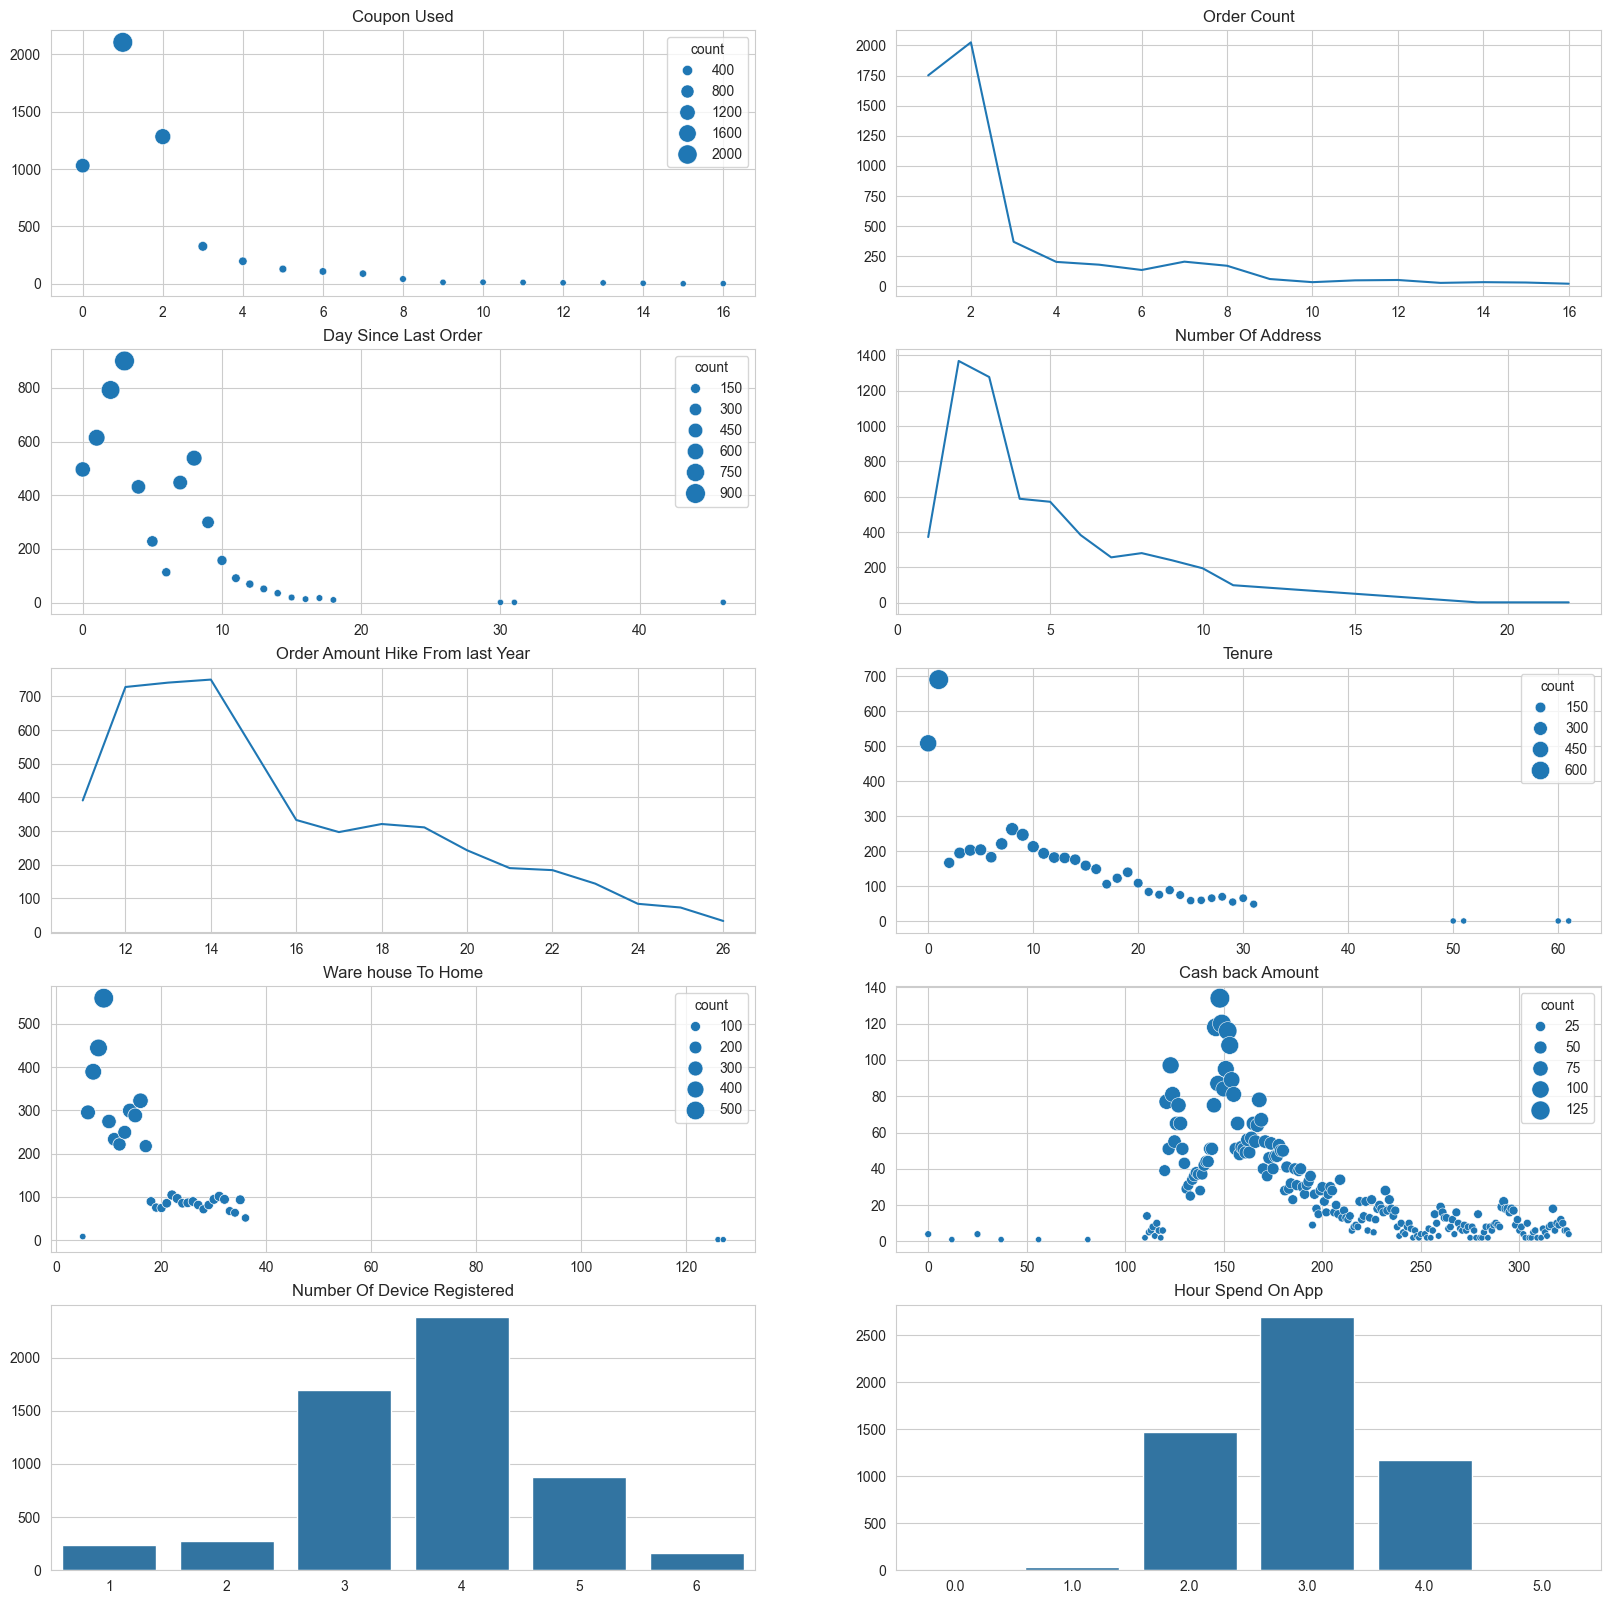

In [141]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

var = df['CouponUsed'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[0, 0])
axes[0, 0].set_title("Coupon Used")
axes[0, 0].set_xlabel("")

var = df['OrderCount'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[0, 1])
axes[0, 1].set_title("Order Count")
axes[0, 1].set_xlabel("")

var = df['DaySinceLastOrder'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[1, 0])
axes[1, 0].set_title("Day Since Last Order")
axes[1, 0].set_xlabel("")

var = df['NumberOfAddress'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[1, 1])
axes[1, 1].set_title("Number Of Address")
axes[1, 1].set_xlabel("")

var = df['OrderAmountHikeFromlastYear'].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("Order Amount Hike From last Year")
axes[2, 0].set_xlabel("")

var = df['Tenure'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[2, 1])
axes[2, 1].set_title("Tenure")
axes[2, 1].set_xlabel("")

var = df['WarehouseToHome'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[3, 0])
axes[3, 0].set_title("Ware house To Home")
axes[3, 0].set_xlabel("")

var = df['CashbackAmount'].sort_values().value_counts(sort=False)
sns.scatterplot(x= var.index, y=var.values, size=var, sizes=(20,200), ax=axes[3, 1])
axes[3, 1].set_title("Cash back Amount")
axes[3, 1].set_xlabel("")

var = df['NumberOfDeviceRegistered'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 0])
axes[4, 0].set_title("Number Of Device Registered")
axes[4, 0].set_xlabel("")

var = df['HourSpendOnApp'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[4, 1])
axes[4, 1].set_title("Hour Spend On App")
axes[4, 1].set_xlabel("")

In [64]:
print(f"Em média, foram {round(df['CouponUsed'][df['CouponUsed'].notnull() == True].mean(), 0)} cupons usados por usuário (desconsiderando as linhas vazias no cálculo).")
var = df['CouponUsed'].sort_values().value_counts(sort=False)
print(f"Participação percentual da quantidade de cupons foram usados por usuários: {((var / var.sum()) * 100).round(2)}")

Em média, foram 2.0 cupons usados por usuário (desconsiderando as linhas vazias no cálculo).
Participação percentual da quantidade de cupons foram usados por usuários: CouponUsed
0.0     19.17
1.0     39.17
2.0     23.87
3.0      6.08
4.0      3.67
5.0      2.40
6.0      2.01
7.0      1.66
8.0      0.78
9.0      0.24
10.0     0.26
11.0     0.22
12.0     0.17
13.0     0.15
14.0     0.09
15.0     0.02
16.0     0.04
Name: count, dtype: float64


In [63]:
print(f"Em média, foram feitos {round(df['OrderCount'][df['OrderCount'].notnull() == True].mean(), 0)} pedidos por usuário (desconsiderando as linhas vazias no cálculo).")
var = df['OrderCount'].sort_values().value_counts(sort=False)
print(f"Participação percentual da quantidade de pedidos por usuários: {((var / var.sum()) * 100).round(2)}")

Em média, foram feitos 3.0 pedidos por usuário (desconsiderando as linhas vazias no cálculo).
Participação percentual da quantidade de pedidos por usuários: OrderCount
1.0     32.59
2.0     37.70
3.0      6.91
4.0      3.80
5.0      3.37
6.0      2.55
7.0      3.83
8.0      3.20
9.0      1.15
10.0     0.67
11.0     0.95
12.0     1.01
13.0     0.56
14.0     0.67
15.0     0.61
16.0     0.43
Name: count, dtype: float64


Text(0.5, 0, '')

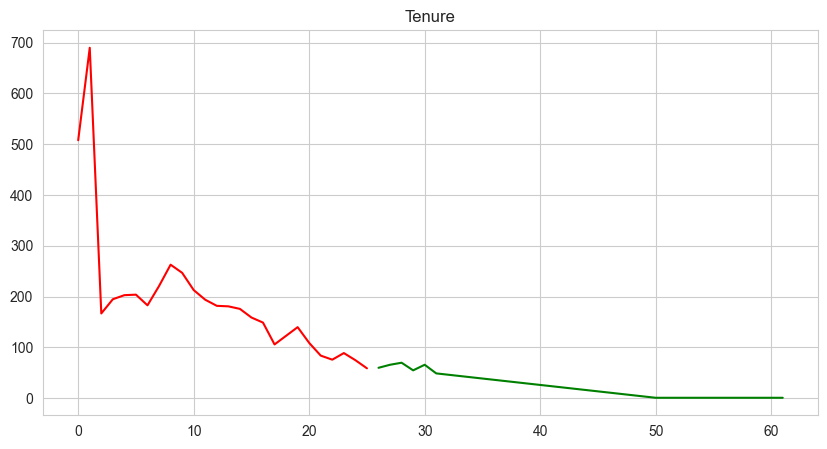

In [99]:
fig, axes = plt.subplots(figsize=(10, 5))

sns.set_style("whitegrid")
var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 0]
sns.lineplot(x= var.index, y=var.values, color="green")

var = df['Tenure'].sort_values().value_counts(sort=False)[df["Churn"] == 1]
sns.lineplot(x= var.index, y=var.values, color="red")

axes.set_title("Tenure")
axes.set_xlabel("")

Pontos interessantes apresentados através dos gráficos e alguns cálculos feitos:
- **Quantos cupons foram usados pelos usuário no último mês?** 
    - Cerca de 82% dos usuários utilizaram entre nenhum a dois cupons no úlimo mês para realizar compras nessa plataforma.
    - Detalhando que 40% dos usuários utilizaram 01 cupom nas sua compras no último mês, 24% usaram 2 e 20% usaram nenhum.
        - Talvez seja interessante de gerar um gráfico de dispersão para acompanhar a quantidade pedidos feitos (OrderCount) com a quantidade de cupons usados (CuponUsed).
- **Quantos pedidos foram feitos pelos usuário no último mês?**
    - Dentro desse recorte dos dados, 70% dos usuários fizeram no máximo dois pedidos até o momento, sendo desses 70%, 33% fizeram apenas um pedido e 38% fizeram dois, aproximadamente.
- **Quanto tempo faz desde de a última compra feita?**
    - A maior parte dos usuários retornaram faz pouco tempo para realizar uma compra.
    - Infelizmente não é possível saber quanto se passou entre o último e o penúltimo pedido para entender o tempo de retorno.
        - Talvez seja interessante fazer um gráfico de dispersão para entender a interassam dessa váriavel com OrderCount, CuponUsed e Churn.
- **Houve crescimento percentual na quantidade de pedidos gerados?**
    - Interessante que, no mínimo, houve crescimento de 11% na quantidade de pedidos feitos em relação ao último ano e o máximo foi 26%.
    - No entanto, a maior parte dos usuários aumentaram, entre 12% a 15%, a quantidade de compras feitas em comparação ao último ano.
        - Aqui também seria interessante separar esses usuários dos demais para entender o porque dessa diferença.
- **A quanto tempo os usuários estão nesse e-commerce?**
    - Não considerando se são churners e não churners, os usuários estão principalmente a menos de um mês ou no primeiro mês. 
    - Considerando que 58% dos usuários estão, no máximo a 10 meses como clientes.

    - Separando os dados entre churners e não-chuerners, parece que a flag (sinalização) da possibilidade do usuário ser ou não está no tempo que faz compras na empresa.
    - Porque usuários considerados como possíveis churners, que podem sair da empresa, não passam de 25 meses, e o que não parecem vão sair, começam aparecer a partir de 26 meses.
        - Verificar quais são as direnças entre ambas as bases seja interressante, para vereficar se existem outras flags além do tempo como cliente.

- **O quão distante fica o armazém dos produtos fica do domicílio dos usuários?**
    - O armazém fica no máximo a 20km do domicílio da maior parte dos usuários. **(imagino que a métrica esteja em quilometros)**
    - Nesse base tem alguns outliers que estão bastante distantes do armazém.

- **Quanto tempo é gasto no site/app?**
    - A maioria dos usuários passaram, aproximadamente, entre 2 a 4 horas. 
        - Será que essa quantidade de tempo é relevante para quantidade de pedidos feitas na base e consequentemente para definir os churners e não churners?

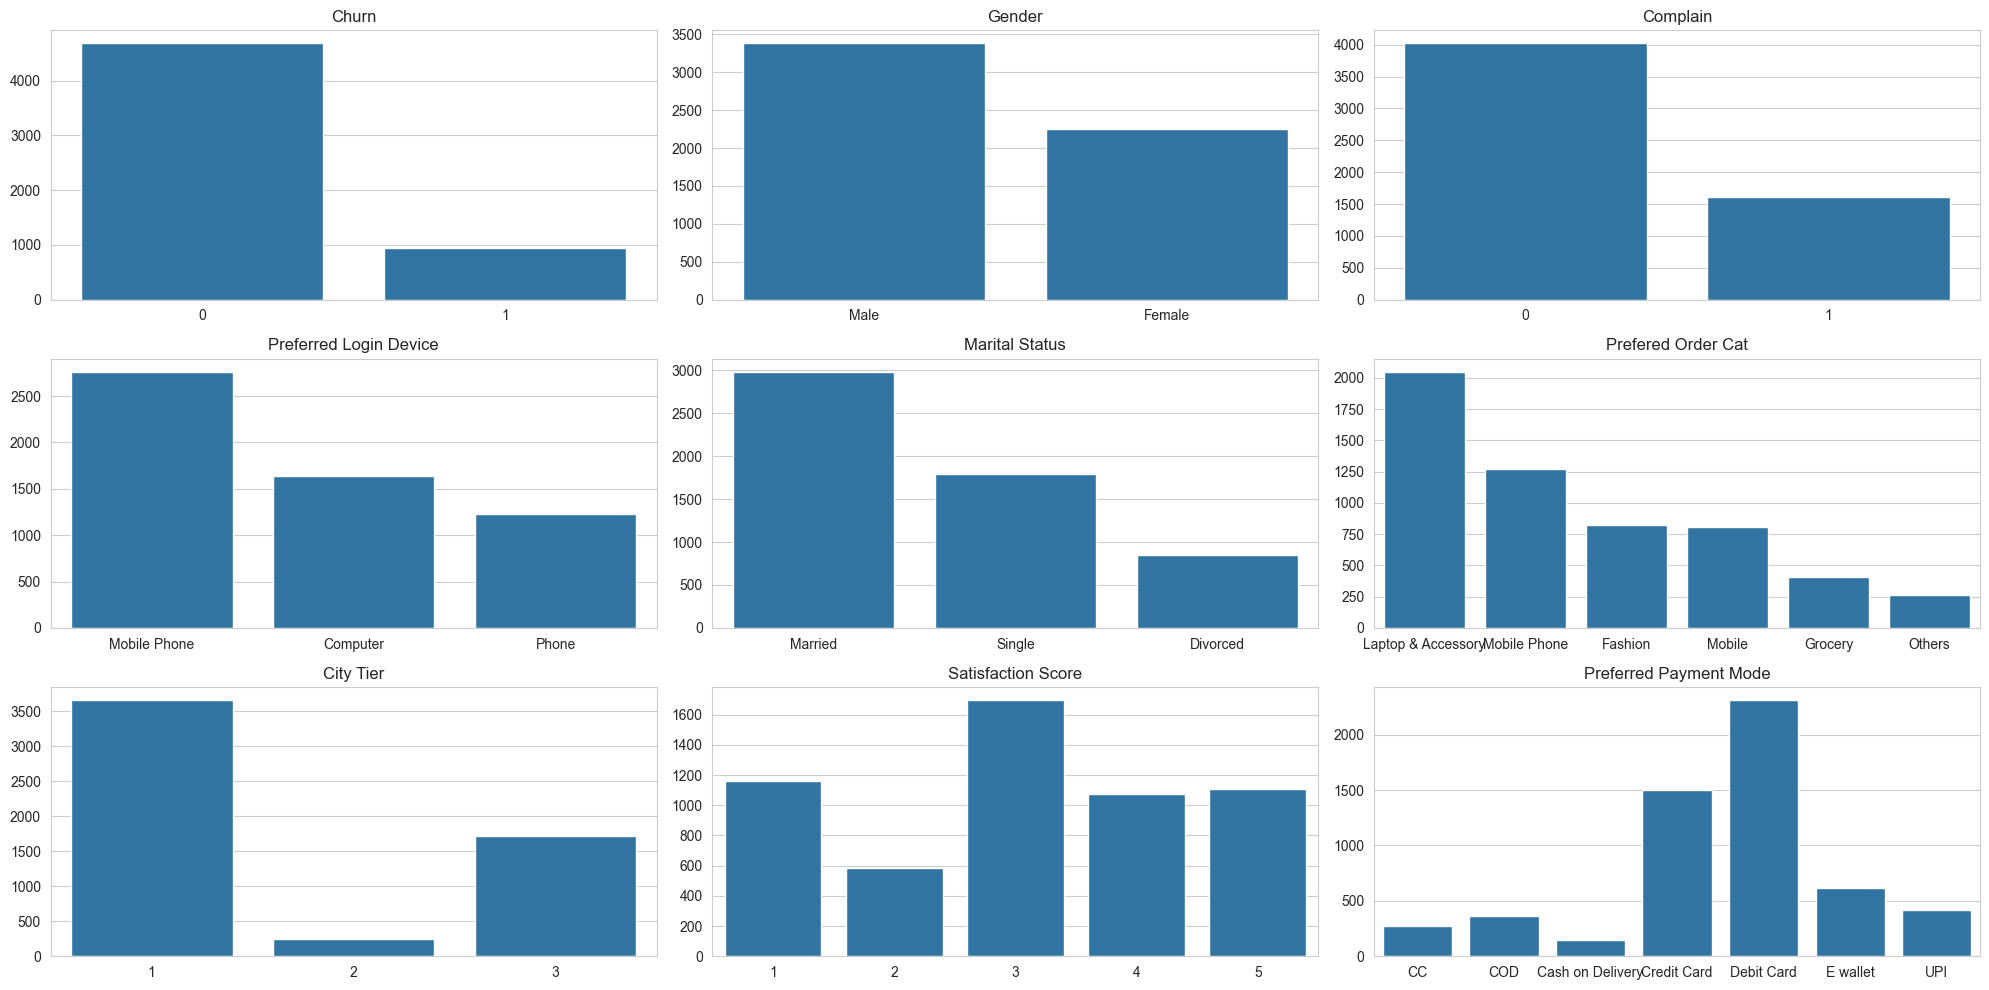

In [29]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 10))

var = df['Churn'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 0])
axes[0, 0].set_title("Churn")
axes[0, 0].set_xlabel("")

var = df['Gender'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 1])
axes[0, 1].set_title("Gender")
axes[0, 1].set_xlabel("")

var = df['Complain'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[0, 2])
axes[0, 2].set_title("Complain")
axes[0, 2].set_xlabel("")

var = df['PreferredLoginDevice'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 0])
axes[1, 0].set_title("Preferred Login Device")
axes[1, 0].set_xlabel("")

var = df['MaritalStatus'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 1])
axes[1, 1].set_title("Marital Status")
axes[1, 1].set_xlabel("")

var = df['PreferedOrderCat'].value_counts().sort_values(ascending=False)
sns.barplot(x=var.index, y=var.values, order=var.index, ax=axes[1, 2])
axes[1, 2].set_title("Prefered Order Cat")
axes[1, 2].set_xlabel("")

var = df['CityTier'].value_counts()
sns.barplot(x= var.index, y=var.values, ax=axes[2, 0])
axes[2, 0].set_title("City Tier")
axes[2, 0].set_xlabel("")

var = df['SatisfactionScore'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[2, 1])
axes[2, 1].set_title("Satisfaction Score")
axes[2, 1].set_xlabel("")

var = df['PreferredPaymentMode'].sort_values().value_counts(sort=False)
sns.barplot(x= var.index, y=var.values, ax=axes[2, 2])
axes[2, 2].set_title("Preferred Payment Mode")
axes[2, 2].set_xlabel("")


plt.tight_layout()

City Tier seja interessante segmentar pelos níveis para verificar se as bases são muito distintas

**Dados faltantes por variável**
- Tenure: 4,7%
- WarehouseToHome: 4,5%
- OrderAmountHikeFromlastYear: 4,7%
- CouponUsed: 4,5%
- OrderCount: 4,6%
- DaySinceLastOrder: 5,5%

In [30]:
print(f'Essa base possui {df.shape[0]} observações, sendo que {df.Churn.value_counts()[1]} são churners, representando {((df.Churn.value_counts()[1]/df.shape[0]) * 100).round(1)}% da base')

Essa base possui 5630 observações, sendo que 948 são churners, representando 16.8% da base
